### Loading the Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

### Performing Visualizations

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

#### Univariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='Count'>

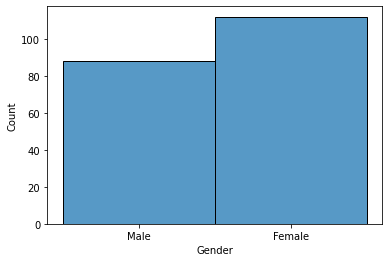

In [6]:
sns.histplot(x=df.Gender)

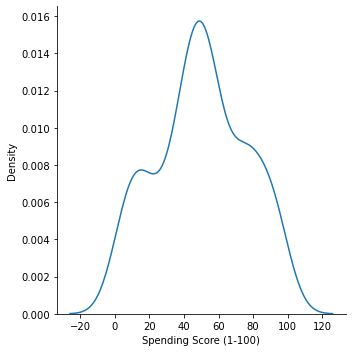

In [7]:
sns.displot(x=df['Spending Score (1-100)'],kind='kde')

#### Bivariate Analysis¶

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

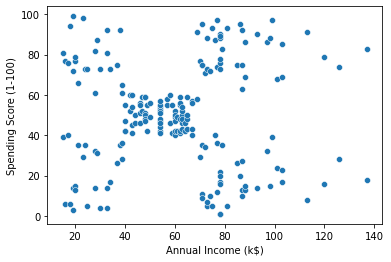

In [8]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

Text(0, 0.5, 'Annual Income (k$)')

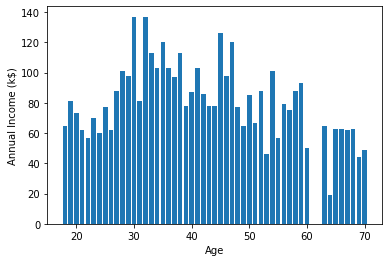

In [9]:
plt.bar(df['Age'],df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

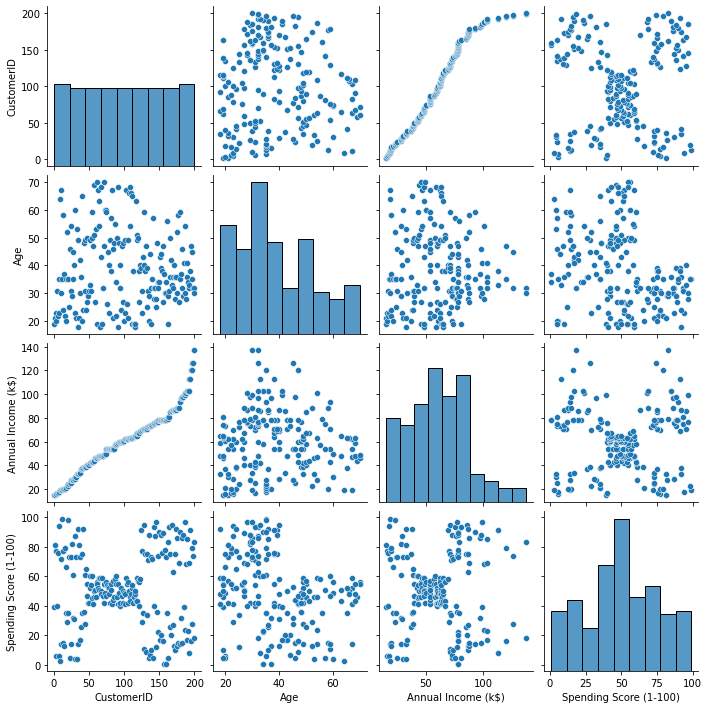

In [10]:
sns.pairplot(df)

#### Multivariate Analysis

In [11]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

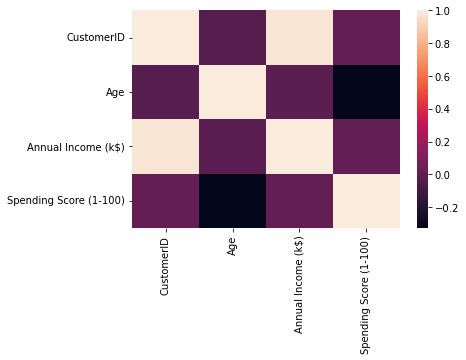

In [12]:
sns.heatmap(df.corr())

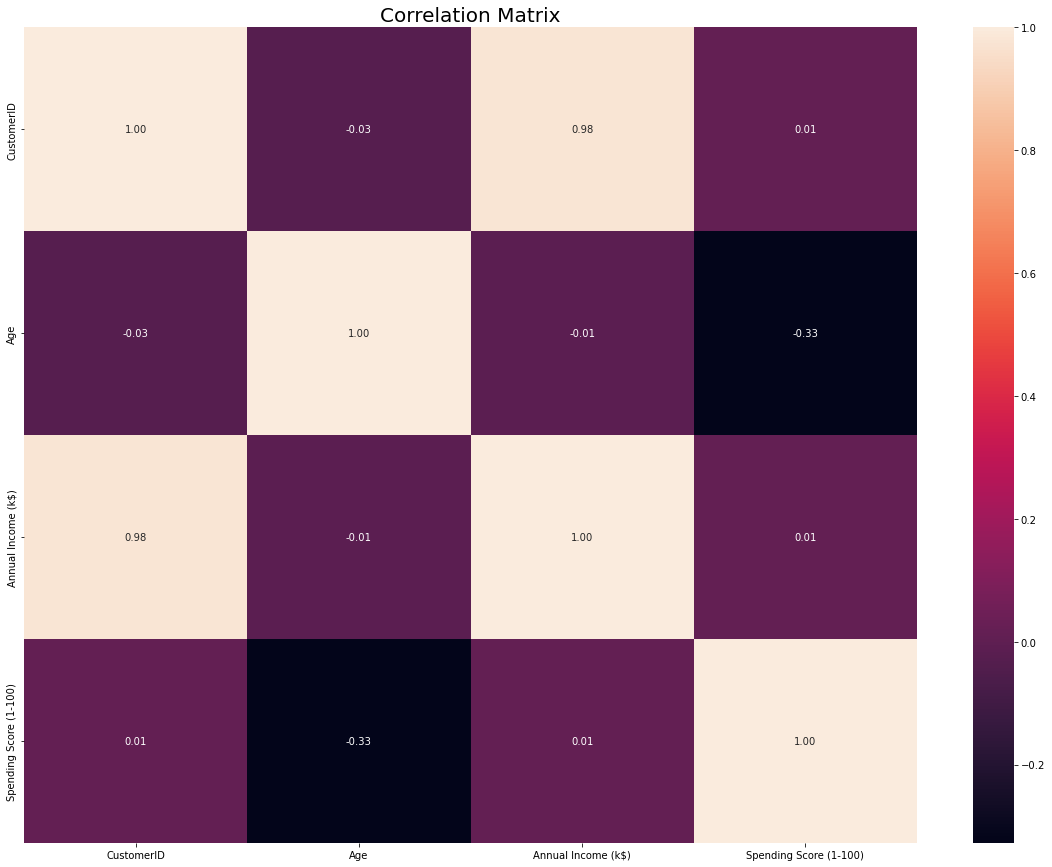

In [13]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

###  Performing Descriptive Statistics on the Dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [16]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
df.mean(numeric_only=True)

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [18]:
df['Annual Income (k$)'].quantile([0.25,0.5,0.75])

0.25    41.5
0.50    61.5
0.75    78.0
Name: Annual Income (k$), dtype: float64

In [19]:
df.max()

CustomerID                 200
Gender                    Male
Age                         70
Annual Income (k$)         137
Spending Score (1-100)      99
dtype: object

In [20]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [21]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Checking for Missing Values and Dealing With Them

In [22]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

### Finding the Outliers and Replacing the Outliers

<AxesSubplot:xlabel='Age'>

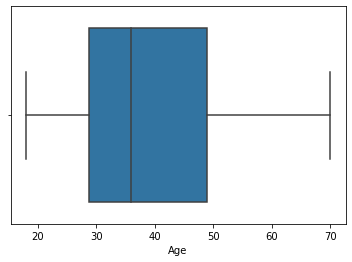

In [23]:
sns.boxplot(x=df.Age)

<AxesSubplot:xlabel='Annual Income (k$)'>

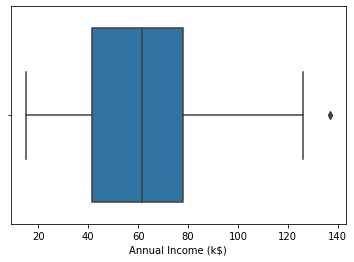

In [24]:
sns.boxplot(x=df['Annual Income (k$)'])

In [25]:
df.shape

(200, 5)

#### Replacing the Outliers

In [26]:
Q1=df['Annual Income (k$)'].quantile(0.25)
Q3=df['Annual Income (k$)'].quantile(0.75)
Q3

78.0

In [27]:
IQR=Q3-Q1
upper_limit=Q3 + 1.5*IQR
lower_limit=Q1 - 1.5*IQR


In [28]:
upper_limit

132.75

In [29]:
df=df[df['Annual Income (k$)']<upper_limit]

<AxesSubplot:xlabel='Annual Income (k$)'>

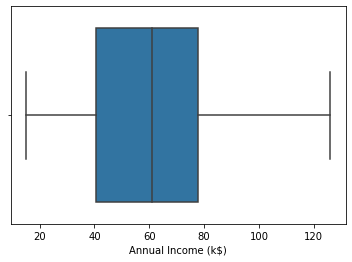

In [30]:
sns.boxplot(x=df['Annual Income (k$)'])

In [31]:
df.shape

(198, 5)

<AxesSubplot:xlabel='Spending Score (1-100)'>

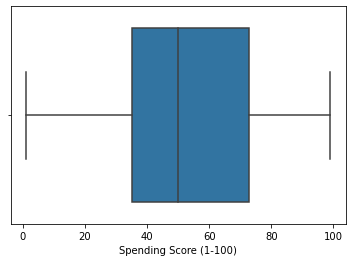

In [32]:
sns.boxplot(x=df['Spending Score (1-100)'])

### Checking For Categorical Columns And Performing Encoding

#### Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le=LabelEncoder()
cat_columns = [cname for cname in df.columns
                        if df[cname].dtype == 'object']

for col in cat_columns:
    df[col] = le.fit_transform(df[col])
    
df.head()

C:\Users\megan\AppData\Local\Temp\ipykernel_38980\3591528535.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### Scaling the Data

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scale = StandardScaler()
df_scaled = pd.DataFrame(scale.fit_transform(df))
df_scaled.head()

,0,1,2,3,4
0,-1.723325,1.141195,-1.425414,-1.779171,-0.435989
1,-1.705829,1.141195,-1.282367,-1.779171,1.199413
2,-1.688334,-0.876275,-1.353890,-1.739447,-1.720949
3,-1.670838,-0.876275,-1.139319,-1.739447,1.043661
4,-1.653342,-0.876275,-0.567131,-1.699723,-0.397051


In [37]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [38]:
df_scaled= pd.DataFrame(scale.fit_transform(df),columns=df.columns)
df_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005076,1.0,0.057692,0.000000,0.816327
2,0.010152,0.0,0.038462,0.009009,0.051020
3,0.015228,0.0,0.096154,0.009009,0.775510
4,0.020305,0.0,0.250000,0.018018,0.397959


In [39]:
new_df=df_scaled.iloc[:,1:5]
new_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


In [40]:
new_df.shape

(198, 4)

### Performing a Clustering Algorithm

In [41]:
from sklearn import cluster

In [42]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(new_df)
    error.append(kmeans.inertia_)

C:\Users\megan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [43]:
error

[86.74172185235217,
 37.97585559179726,
 30.392897987635834,
 23.230718749982977,
 20.040461326376864,
 17.066462167111,
 14.804917368151035,
 12.53331778075966,
 10.858094215413468,
 9.494639787806808]

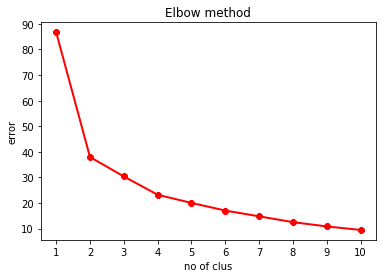

In [44]:
plt.plot(range(1,11), error, linewidth=2, color="red", marker ="8")
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.xticks(np.arange(1,11,1))
plt.ylabel('error')
plt.show()

In [45]:
km_model=cluster.KMeans(n_clusters=5,init='k-means++',random_state=0)
km_model.fit(new_df)

KMeans(n_clusters=5, random_state=0)

In [46]:
ykmeans =km_model.predict(new_df)
ykmeans

array([2, 2, 3, 1, 1, 1, 3, 1, 4, 1, 4, 1, 3, 1, 0, 2, 3, 2, 4, 1, 2, 2,
       3, 2, 3, 2, 3, 2, 3, 1, 4, 1, 4, 2, 3, 1, 3, 1, 3, 1, 3, 2, 4, 1,
       3, 1, 3, 1, 1, 1, 3, 2, 1, 4, 3, 4, 3, 4, 1, 4, 4, 2, 3, 3, 4, 2,
       3, 3, 2, 1, 4, 3, 3, 3, 4, 2, 3, 2, 1, 3, 4, 2, 4, 3, 1, 4, 3, 1,
       1, 3, 3, 2, 4, 3, 1, 2, 3, 1, 4, 2, 1, 3, 4, 2, 4, 1, 3, 4, 4, 4,
       4, 1, 3, 2, 1, 1, 3, 3, 3, 3, 2, 3, 1, 2, 1, 1, 0, 2, 4, 2, 0, 2,
       1, 1, 0, 1, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2, 0, 1, 3, 2, 0, 2, 3, 1,
       3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2, 3, 1,
       0, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 2, 3, 1, 3, 1, 0, 1, 3, 1, 3, 2])

In [47]:
km_model.predict([[0.0,0.09,0.5,0.5]])

C:\Users\megan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

### Adding the Cluster Data with the Primary Dataset

In [48]:
new_df['kclus'] = pd.Series(ykmeans)
new_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1.0,0.019231,0.000000,0.387755,2
1,1.0,0.057692,0.000000,0.816327,2
2,0.0,0.038462,0.009009,0.051020,3
3,0.0,0.096154,0.009009,0.775510,1
4,0.0,0.250000,0.018018,0.397959,1


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

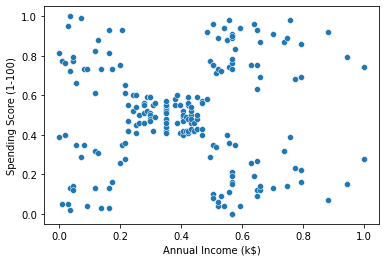

In [49]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=new_df)

### Splitting The Data Into Dependent And Independent Variables

In [50]:
X= new_df.iloc[:,:-1]
X.head()          

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


In [51]:
y=new_df.kclus
y.head()

0    2
1    2
2    3
3    1
4    1
Name: kclus, dtype: int32

### Splitting the Data Into Training and Testing

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((158, 4), (40, 4), (158,), (40,))

### Building the Model

In [53]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()

In [54]:
mlr.fit(x_train,y_train)

LinearRegression()

### Training the Model

In [55]:
y_pred = mlr.predict(x_test)

### Testing the Model

In [56]:
y_pred = [value for value in y_pred]
pd.DataFrame({'Actual_y':y_test,'Predicted_y':y_pred})

,Actual_y,Predicted_y
175,1,1.353272
40,3,3.728410
34,3,2.759365
90,3,3.764437
145,2,1.513048
182,0,2.033324
95,2,1.279682
4,1,1.969627
29,1,1.558146
167,1,1.585106


### Measuring the Performance Using Metrics

In [57]:
from sklearn import metrics
print("MAE           = ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE           = ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE          = ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2 = metrics.r2_score(y_test,y_pred)
print("R2            = ",r2)

adj_r2 = 1 - ((1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1))
print("Adjusted R2   = ",adj_r2)

MAE           =  0.7613389723225296
MSE           =  0.931621049028319
RMSE          =  0.9652051849365082
R2            =  0.3345563935512007
Adjusted R2   =  0.32076481621547437
